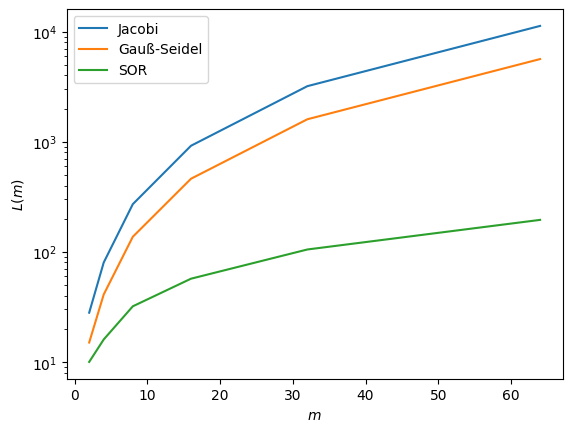

In [2]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt


def norm(matrix, x_vector, b_vector):
    return np.linalg.norm(matrix@x_vector-b_vector, ord=np.inf)/np.linalg.norm(x_vector, ord=np.inf)


def jacobi(matrix, b_vector):
    k = 0
    x_vector = np.ones_like(b_vector)
    while (norm(matrix, x_vector, b_vector) > 10**-8) and (k < 2*10**4):
        k += 1
        x_temp = b_vector.copy()
        for i in range(len(b_vector)):
            x_temp[i] -= np.sum(
                np.delete(
                    matrix[i,:] * x_vector, i
                )
            )
            x_temp[i] /= matrix[i, i]
        x_vector = x_temp
    return k


def gausseidel(matrix, b_vector):
    k = 0
    x_vector = np.ones_like(b_vector)
    while (norm(matrix, x_vector, b_vector) > 10**-8) and (k < 2*10**4):
        k += 1
        for i in range(len(b_vector)):
            x_vector[i] = (
                b_vector[i] - np.sum(matrix[i, :i] * x_vector[:i]) - np.sum(matrix[i, i + 1:] * x_vector[i + 1:])
            ) / matrix[i, i]
    return k


def sor(matrix, b_vector, relax_par):
    k = 0
    x_vector = np.ones_like(b_vector)
    while (norm(matrix, x_vector, b_vector) > 10**-8) and (k < 2*10**4):
        k += 1
        for i in range(len(b_vector)):
            x_vector[i] = (1 - relax_par) * x_vector[i] + (
                b_vector[i] - np.sum(matrix[i, :i] * x_vector[:i]) - np.sum(matrix[i, i + 1:] * x_vector[i + 1:])
            ) * relax_par / matrix[i, i]
    return k


def a_func(n, m, dim_m=2):
    if n == m:
        ret = 4
    elif abs(n - m) == abs(dim_m) or (abs(n - m) == 1 and not (n + m + 1) % (2 * dim_m) == 0):
        ret = -1
    else:
        ret = 0
    return ret


a_func = np.vectorize(a_func)
m_list = []
jacobi_list = []
gausseidel_list = []
sor_list = []

for k in range(1, 7):
    m = 2**k
    a_dens = a_func(*np.ogrid[0:m ** 2, 0:m ** 2], dim_m=m)
    h = 1 / (m+1)
    relax_par = 2 / (1 + np.sqrt(1-np.cos(h*np.pi)**2))
    b_vector = np.ones(m**2)

    m_list.append(m)
    jacobi_list.append(jacobi(a_dens, b_vector))
    gausseidel_list.append(gausseidel(a_dens, b_vector))
    sor_list.append(sor(a_dens, b_vector, relax_par))

fig, ax = plt.subplots()
ax.semilogy(m_list, jacobi_list, label='Jacobi')
ax.semilogy(m_list, gausseidel_list, label='Gauß-Seidel')
ax.semilogy(m_list, sor_list, label='SOR')
ax.set(xlabel='$m$', ylabel='$L(m)$')
ax.legend()


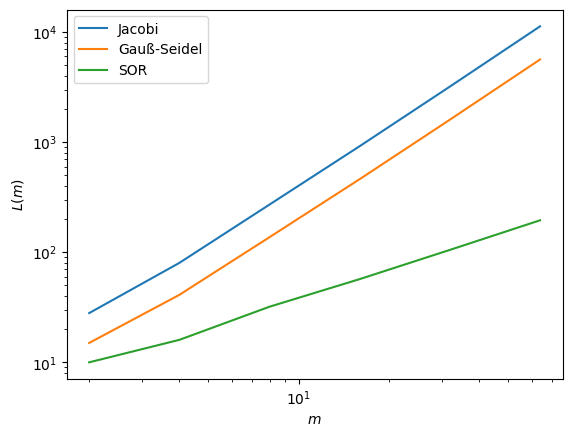

In [3]:
fig, ax = plt.subplots()
ax.loglog(m_list, jacobi_list, label='Jacobi')
ax.loglog(m_list, gausseidel_list, label='Gauß-Seidel')
ax.loglog(m_list, sor_list, label='SOR')
ax.set(xlabel='$m$', ylabel='$L(m)$')
ax.legend()